# 练习1

Q: 支持向量机背后的基本思想是什么？

A: 在保持间隔不违规的情况下，最大化分类间隔。**另一个是在非线性数据训练时，使用核技巧**

# 练习2

Q: 什么是支持向量

A: SVM决策边界间隔上的样本。**“街道”上的样本。计算预测只涉及支持向量，而不是所有的数据集**

# 练习3

Q: 当使用SVM时，为什么标准化输入很重要？

A: 因为SVM对数据的尺度很敏感。他需要计算特征之间的点积。**未缩放，SVM倾向于忽略小特征**

# 练习4

Q: 分类一个样本时，SVM分类器能够输出一个置信值吗？概率呢？

A: 不能，SVM不能给出一个概率值。**SVM可以输出一个测试实例与决策边界之间的距离，可以把这个距离当做置信分数。但是不能直接转化成类概率。`sklearn` 中，如果需要输出概率，将使用SVM分数的Logistic回归校准概率**

# 练习5

Q: 在一个有数百万训练样本和数百特征的训练集上，你是否应该使用SVM原始形式或对偶形式来训练一个模型？

A: **仅适用于线性kernel。原始形式时间复杂度为 $m$ 成正比，而对偶形式在 $m^2$ 和 $m^3$ 之间。**

# 练习6

Q: 假设你用RBF核来训练一个SVM分类器，如果对训练集欠拟合：你应该增大或减小 $\gamma$ 吗？调整参数 $C$ 呢？

A: 应该增大 $\gamma$，增大 $C$。

# 练习7

Q: 使用现有的QP解决方案，你应该怎么样设置QP参数(H, f, A和b)去解决一个软间隔线性SVM分类器问题？

A: 

# 练习8

Q: 在一个线性可分的数据集训练一个 `LinearSVC`，并在同一个数据集上训练一个 `SVC` 和 `SGDClassifier`，看它们是否产生了大致相同效果的模型。

In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC, SVC

%matplotlib inline

In [2]:
def plot_decision_bundary(estimator, X, y, title=None, num=100):
    X1_lin = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, num=num)
    X2_lin = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, num=num)
    X11, X22 = np.meshgrid(X1_lin, X2_lin)
    Z = estimator.predict(np.c_[X11.ravel(), X22.ravel()]).reshape(X11.shape)
    plt.contourf(X1_lin, X2_lin, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    if title:
        plt.title(title)

In [3]:
# X, y = make_classification(n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, n_classes=2)
with open('svm-exercise-8.pkl', 'rb') as f:
    X, y = pickle.load(f)

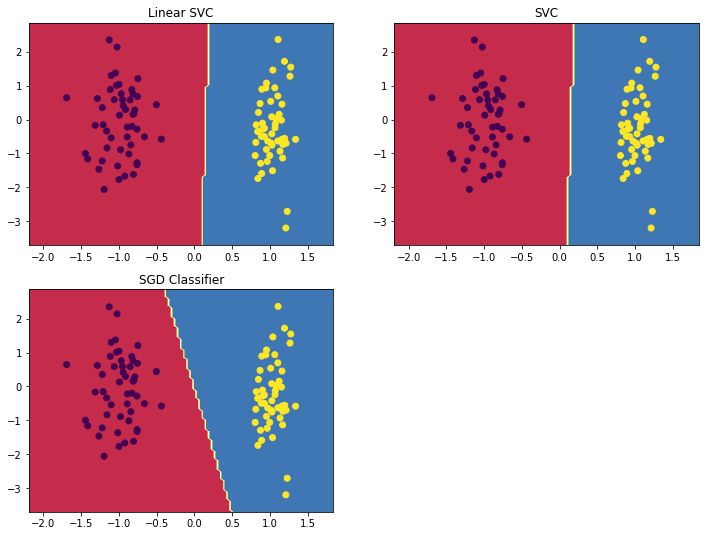

In [4]:
linear_svc = LinearSVC(loss='hinge', C=1.0)
linear_svc.fit(X, y)
svc = SVC(C=1.0, kernel='linear', tol=0.0001)
svc.fit(X, y)
sgd_clf = SGDClassifier(loss='hinge', tol=0.0001)
sgd_clf.fit(X, y)
plt.figure(22, figsize=(12, 9))
plt.subplot(221)
plot_decision_bundary(linear_svc, X, y, title="Linear SVC")
plt.subplot(222)
plot_decision_bundary(svc, X, y, title="SVC")
plt.subplot(223)
plot_decision_bundary(sgd_clf, X, y, title="SGD Classifier")

`LinearSVC` 和 `SVC` 的结果大致相同，`SGDClassifier` 则有一些区别。他的决策边界某一侧更靠近某个类别，泛化能力可能不及 `SVM`

# 练习9

Q: 在MNIST数据集上训练一个SVM分类器。因为SVM分类器是二元的分类，你需要使用一对多（one-versus-all）来对10个数字进行分类。你可能需要使用小的验证集来调整超参数，以加快进程。最后你能达到多少准确度？

In [25]:
from sklearn.datasets import fetch_mldata
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

mnist_data = fetch_mldata("MNIST original")
X, y = mnist_data["data"], mnist_data["target"]
X_train, y_train = X[:60000], y[:60000]
np.random.seed(42)
idx = np.random.permutation(X_train.shape[0])
X_train = X_train[idx]
y_train = y_train[idx]
X_val, X_test, y_val, y_test = train_test_split(X[60000:], y[60000:], test_size=0.8, random_state=42, stratify=y[60000:])
print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("X validate shape:", X_val.shape)
print("y validate shape:", y_val.shape)
print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

X train shape: (60000, 784)
y train shape: (60000,)
X validate shape: (2000, 784)
y validate shape: (2000,)
X test shape: (8000, 784)
y test shape: (8000,)


In [6]:
svc_clf = LinearSVC(random_state=42)  # train: 0.8936, validate: 0.8868
# svc_clf = SVC(kernel="rbf", C=1.0, gamma='auto', random_state=42)  # 太慢
svc_clf.fit(X_train, y_train)
print("training f1 score:", f1_score(y_train, svc_clf.predict(X_train), average='weighted'))
print("validate f1 score:", f1_score(y_val, svc_clf.predict(X_val), average='weighted'))

training f1 score: 0.8452065135346578
validate f1 score: 0.8349689218999665


效果不是特别好，尝试尝试将数据标准化

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
print("scaled finished")
svc_clf = LinearSVC(random_state=42)
svc_clf.fit(X_train_scaled, y_train)
print("training f1 score:", f1_score(y_train, svc_clf.predict(X_train_scaled), average='weighted'))
print("validate f1 score:", f1_score(y_val, svc_clf.predict(X_val_scaled), average='weighted'))

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


scaled finished
training f1 score: 0.9216240645803909
validate f1 score: 0.9178144901742319


下面使用在rbf核上使用少量数据进行尝试

In [9]:
svc_rbf = SVC(kernel='rbf', random_state=42)
svc_rbf.fit(X_train_scaled[:10000], y_train[:10000])
print("train f1 score:", f1_score(y_train, svc_rbf.predict(X_train_scaled), average='weighted'))

train f1 score: 0.9461901054235666


仅仅用了1/6的数据就让训练集达到了更好的结果。
接下来，可以使用RandomizedSearchCV进行查找超参数。

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

random_params = {
    'gamma': reciprocal(0.001, 0.1),
    'C': uniform(1, 10)
}
random_search_cv = RandomizedSearchCV(SVC(), random_params, n_iter=10, verbose=2)
random_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=3.5988934774124326, gamma=0.001513186272679838 ................
[CV] . C=3.5988934774124326, gamma=0.001513186272679838, total=   0.7s
[CV] C=3.5988934774124326, gamma=0.001513186272679838 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] . C=3.5988934774124326, gamma=0.001513186272679838, total=   0.7s
[CV] C=3.5988934774124326, gamma=0.001513186272679838 ................
[CV] . C=3.5988934774124326, gamma=0.001513186272679838, total=   0.7s
[CV] C=3.055855399572819, gamma=0.06719156480223124 ..................
[CV] ... C=3.055855399572819, gamma=0.06719156480223124, total=   0.9s
[CV] C=3.055855399572819, gamma=0.06719156480223124 ..................
[CV] ... C=3.055855399572819, gamma=0.06719156480223124, total=   0.9s
[CV] C=3.055855399572819, gamma=0.06719156480223124 ..................
[CV] ... C=3.055855399572819, gamma=0.06719156480223124, total=   0.9s
[CV] C=1.107005900704854, gamma=0.001848939794318145 .................
[CV] .. C=1.107005900704854, gamma=0.001848939794318145, total=   0.7s
[CV] C=1.107005900704854, gamma=0.001848939794318145 .................
[CV] .. C=1.107005900704854, gamma=0.001848939794318145, total=   0.7s
[CV] C=1.107005900704854, gamma=0.001848939794318145 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   38.2s finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x10798a4e0>, 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x107957240>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [11]:
print("best estimator f1 score:", f1_score(y_train, random_search_cv.best_estimator_.predict(X_train_scaled), average='weighted'))

best estimator f1 score: 0.8866264279208079


仅仅在1000条数据集上，f1值就达到了0.8866，接下来，在整个训练集上使用最佳的模型，进行训练。

In [12]:
random_search_cv.best_estimator_.fit(X_train_scaled, y_train)  # 大量时间2.7h 到 16.2h

SVC(C=6.335534109540218, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0011263118134606108,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
X_test_scaled = scaler.transform(X_test)
print("test f1 score:", f1_score(y_train, random_search_cv.best_estimator_.predict(X_train_scaled), average='weighted'))
print("test f1 score:", f1_score(y_test, random_search_cv.best_estimator_.predict(X_test_scaled), average='weighted'))

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


test f1 score: 0.9973163289338954
test f1 score: 0.9723707429260284


**总结：**

1. 使用SVM模型的时候，不要忘了标准化
2. 在数据集很大，想尝试非线性核的时候，可以使用少量数据进行试验，探索是否有提升可能
3. 在进行超参数搜索的时候，可以使用更少的数据进行搜索，然后再在大型数据集上进行训练

**如果避免过拟合？**

# 练习10

Q: 在加利福尼亚住宅（California housing）数据集上训练一个SVM回归模型

In [14]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR, LinearSVR

In [15]:
housing_data = fetch_california_housing()
X, y = housing_data["data"], housing_data["target"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print("X train shape:", X_train.shape)
print("y train shape:", y_train.shape)
print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

X train shape: (16512, 8)
y train shape: (16512,)
X test shape: (4128, 8)
y test shape: (4128,)


In [17]:
linear_svr = LinearSVR(C=1.0, random_state=42)
linear_svr.fit(X_train_scaled, y_train)
print("MSE:", mean_squared_error(y_train, linear_svr.predict(X_train_scaled)))
error = cross_val_score(linear_svr, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("avg:", - np.average(error))
print("std:", np.std(error))

MSE: 0.954517044073374
avg: 1.8963171644895973
std: 2.3405504544169844


可以看到，模型是存在过拟合的，但是不存在，让我们在rbf核上，使用RandomSearch来查找超参数

In [18]:
random_params_r = {'gamma': reciprocal(0.001, 0.1), 'C': uniform(1, 10)}
random_search_cv_r = RandomizedSearchCV(SVR(), random_params_r, n_iter=10, random_state=42, verbose=2, n_jobs=-1)
random_search_cv_r.fit(X_train_scaled, y_train)
print("best params:", random_search_cv_r.best_params_)
error = cross_val_score(random_search_cv_r.best_estimator_, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
print("MSE:", mean_squared_error(y_train, random_search_cv_r.best_estimator_.predict(X_train_scaled)))
print("avg:", - np.average(error))
print("std:", np.std(error))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] C=4.745401188473625, gamma=0.07969454818643928 ..................
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.8s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.4s
[CV] C=8.31993941811405, gamma=0.015751320499779724 ..................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.6s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] ... C=4.745401188473625, gamma=0.07969454818643928, total=  10.7s
[CV] C=2.560186404424365, gamma=0.002051110418843397 .................
[CV] ... C=8.31993941811405, gamma=0.015751320499779724, total=   9.0s
[CV] C=2.5601864

[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.5min finished


best params: {'C': 4.745401188473625, 'gamma': 0.07969454818643928}
MSE: 0.3280453999995988
avg: 0.34513734161426385
std: 0.01286396184031348


In [19]:
def plot_regression(estimator, X, y, title=None, num=100):
    plt.scatter(X, y, c='b', marker='s')
    X.sort(axis=0)
    y_predict = estimator.predict(X.reshape(-1, 1))
    plt.plot(X, y_predict)

In [20]:
print("Linear SVR test error:", mean_squared_error(y_test, linear_svr.predict(X_test)))
print("SVR test error:", mean_squared_error(y_test, random_search_cv_r.best_estimator_.predict(X_test))) 

Linear SVR test error: 6814.440742175993
SVR test error: 1.9259625520365604


next step:

**解决模型过拟合问题**